In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import pywt

In [2]:
file_path = f'../data/lob_data/lob_data_train_s.h5'
dataset = {}

with h5py.File(file_path, 'r') as file:
    dataset['inputs'] = file['inputs'][:]
    dataset['outputs'] = file['outputs'][:]

In [3]:
time_ind = dataset['inputs'][:, 0]
diff = np.diff(time_ind)
last_increasing_idx = np.where(diff <= 0)[0]
start_idx = np.insert(last_increasing_idx,0,-1)
Seqs = {}
a = 0
for i in range(len((start_idx[:-1]))):
    Seqs[f'{a}'] = {
        't': time_ind[start_idx[i]+1:start_idx[i+1]+1],
        'v': dataset['outputs'][start_idx[i]+1:start_idx[i+1]+1]
    }
    a+=1
Seqs[f'{a}'] = {
        't': time_ind[start_idx[-1]+1:],
        'v': dataset['outputs'][start_idx[-1]+1:]
    }

In [30]:
time_ind[start_idx[1]]

3587.675

In [4]:
t_interp = np.arange(0,3600,0.01)
for i in range(200):
    interpolator = interp1d(Seqs[f'{i}']['t'], Seqs[f'{i}']['v'], kind='linear',fill_value="extrapolate")
    Seqs[f'{i}']['interp'] = interpolator(t_interp)
    

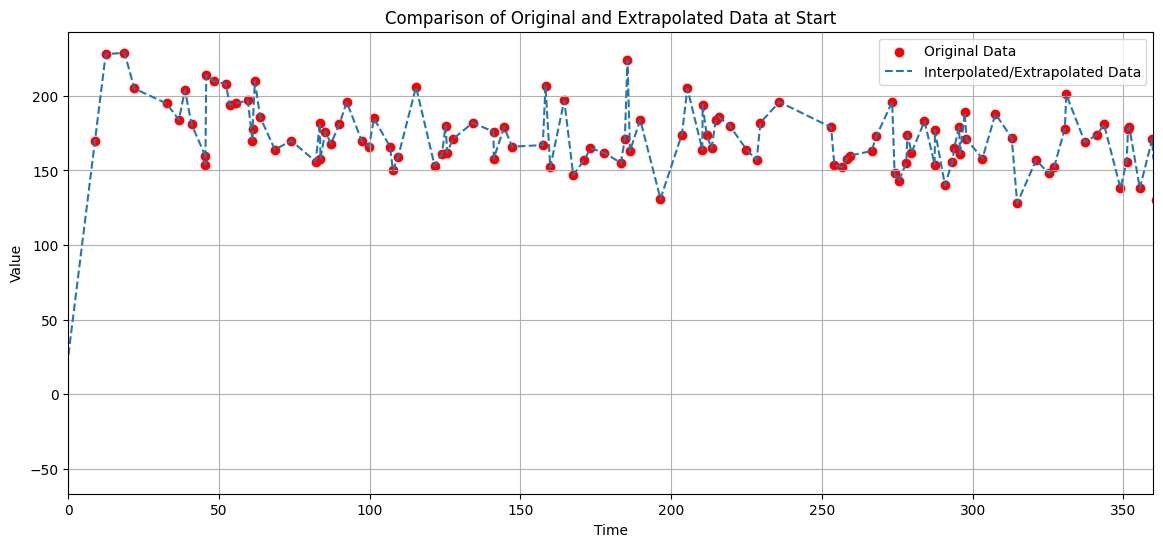

In [5]:
plt.figure(figsize=(14, 6))

i = 199
# 绘制原始数据点
plt.scatter(Seqs[f'{i}']['t'],Seqs[f'{i}']['v'], color='red', label='Original Data')

# 绘制外插数据点
plt.plot(t_interp, Seqs[f'{i}']['interp'], label='Interpolated/Extrapolated Data', linestyle='--')

# 显示图例
plt.legend()

# 限制x轴范围查看开头和结尾
plt.xlim([0, 360])  # 调整此处来查看开头或使用plt.xlim([3500, 3600])来查看结尾
plt.title('Comparison of Original and Extrapolated Data at Start')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.show()

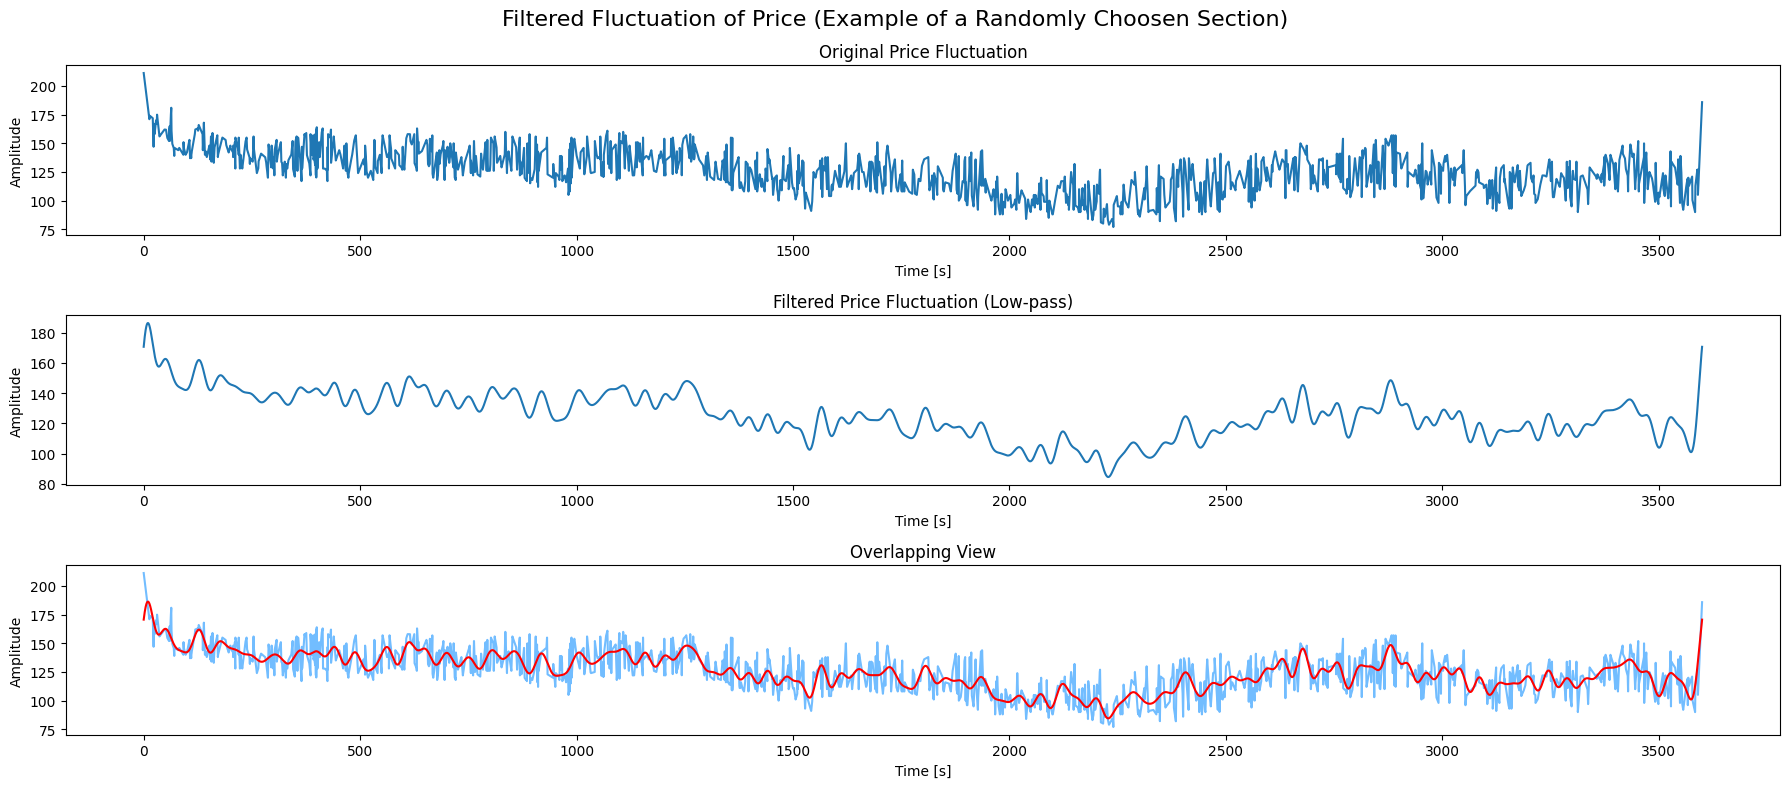

In [15]:
# 计算FFT

i = 4

fft_values = np.fft.fft(Seqs[f'{i}']['interp'])
fft_freq = np.fft.fftfreq(n=len(t_interp), d=(t_interp[1] - t_interp[0]))

cutoff_freq = 0.025
fft_values[(fft_freq > cutoff_freq)] = 0
fft_values[(fft_freq < -cutoff_freq)] = 0
filtered_signal = np.fft.ifft(fft_values).real 
plt.figure(figsize=(18, 8))
plt.suptitle('Filtered Fluctuation of Price (Example of a Randomly Choosen Section)', fontsize=16)
plt.subplot(3, 1, 1)
plt.plot(t_interp, Seqs[f'{i}']['interp'])
plt.title('Original Price Fluctuation')
#plt.xlim(0,500)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t_interp, filtered_signal)
plt.title('Filtered Price Fluctuation (Low-pass)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t_interp, Seqs[f'{i}']['interp'],'#72BDFF')
plt.plot(t_interp, filtered_signal,'r')
plt.title('Overlapping View')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()

plt.savefig('Filtered Fluctuation of Price (Example of a Randomly Choosen Section).pdf')
plt.show()



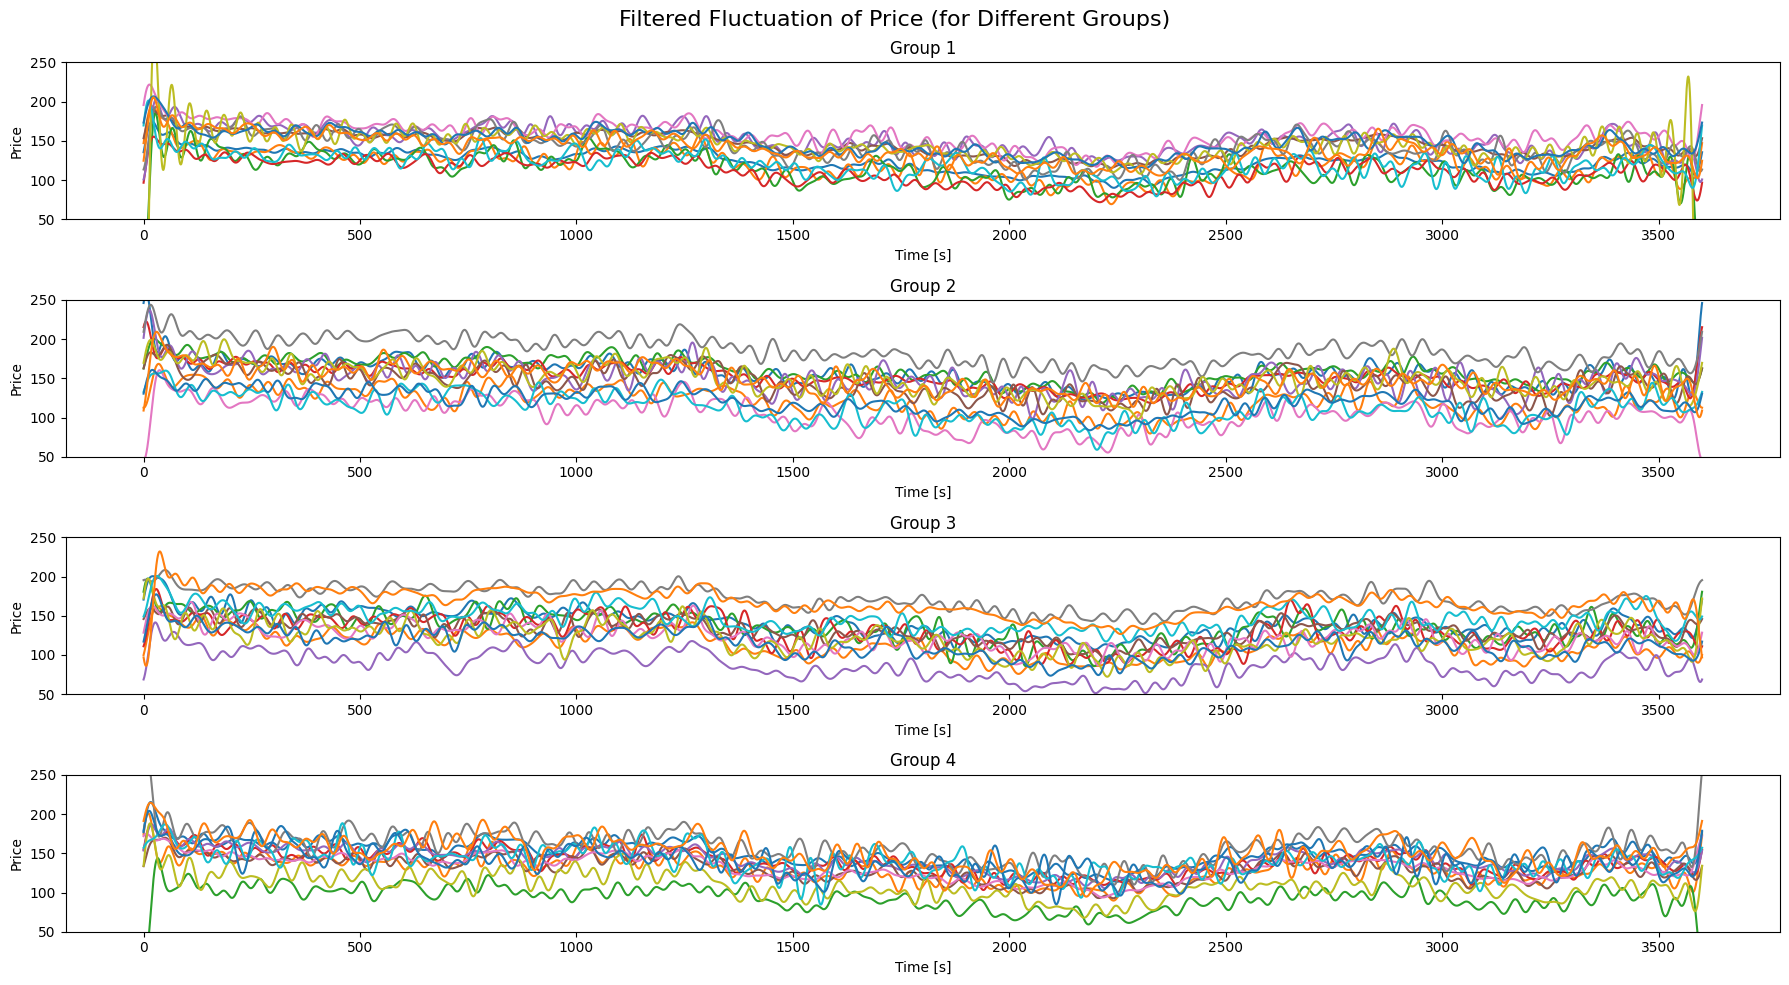

In [16]:
plt.figure(figsize=(18, 10))
plt.suptitle('Filtered Fluctuation of Price (for Different Groups)', fontsize=16)
ad = 8
for ii in range(4):
    plt.subplot(4, 1, ii+1)

    for i in range(12):
        fft_values = np.fft.fft(Seqs[f'{i+ad}']['interp'])
        fft_freq = np.fft.fftfreq(n=len(t_interp), d=(t_interp[1] - t_interp[0]))
        cutoff_freq = 0.025
        fft_values[(fft_freq > cutoff_freq)] = 0
        fft_values[(fft_freq < -cutoff_freq)] = 0
        filtered_signal = np.fft.ifft(fft_values).real 
        plt.plot(t_interp, filtered_signal)
    plt.title(f'Group {ii+1}')
    plt.ylim(50,250)
    plt.xlabel('Time [s]')
    plt.ylabel('Price')

    ad += 50

plt.tight_layout()
plt.savefig('Filtered Fluctuation of Price (for Different Groups).pdf')